DATA 

https://raw.githubusercontent.com/aws-samples/amazon-textract-and-comprehend-medical-document-processing/main/data/mtsamples.csv 

The dataset is derived from the medical transcription samples available at http://mtsamples.com/
These are medical transcriptions and we want to classify them to clinical domains given in the target column medical_specialty . 

Write a brief summary on these topics related to this problem:

1.	Feature engineering:
○	How do you propose to turn the data into something we can do predictive modeling?
○	Deliverables: features list and calculations, packages used 

2.	Handling missing values: 
○	We may design features based on their availability across samples. What happens when new data comes without these features?
○	 Deliverables : Notes, list methods with descriptions, packages used

3.	Handling the data imbalance in the data:
○	Some targets may have very few samples while some others will have a lot of samples, 
○	Deliverables: methods and descriptions with block diagrams, packages 

4.	Modeling pipeline: 
○	Splitting train, val and test data and training models and fine tuning the hyperparameters 
○	Deliverables: flow charts, model names and hyper parameters 

5.	MLOps: 
○	Skim through this MLOps blog and  write a brief proposal on an architecture for our problem which would ingest new data periodically and deploy new models when required 
○	Deliverables: descriptions and Flow chart and packages 

6.	Identifying and handling bias: 
○	like gender, age or race related bias 
○	Deliverables:  Notes

7.	What special features do you identify for this medical text data: 
○	 may be look at the vocabulary, abbreviations etc 
○	Deliverables: Notes 

Helpful links:

https://allenai.github.io/scispacy/ https://www.analyticsvidhya.com/blog/2020/06/nlp-project-information-extraction/
https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/ 
https://www.analyticsvidhya.com/blog/2017/03/imbalanced-data-classification/ 
Submit your workshop here! *

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#importing dataset


import pandas as pd
pd.set_option('display.max_colwidth', -1)

url='https://raw.githubusercontent.com/aws-samples/amazon-textract-and-comprehend-medical-document-processing/main/data/mtsamples.csv'


df=pd.read_csv(url)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """


In [ ]:
df

description  ...                                                                                                                                                                                                                                                                                                                                 keywords
0      A 23-year-old white female presents with complaint of allergies.                                                                                                                                                                                                      ...  allergy / immunology, allergic rhinitis, allergies, asthma, nasal sprays, rhinitis, nasal, erythematous, allegra, sprays, allergic,                                                                                                                                                                                                    
1      Consult for laparoscopic gastric bypass.                                                                                                                                                                                                                              ...  bariatrics, laparoscopic gastric bypass, weight loss programs, gastric bypass, atkin's diet, weight watcher's, body weight, laparoscopic gastric, weight loss, pounds, months, weight, laparoscopic, band, loss, diets, overweight, lost                                                                                               
2      Consult for laparoscopic gastric bypass.                                                                                                                                                                                                                              ...  bariatrics, laparoscopic gastric bypass, heart attacks, body weight, pulmonary embolism, potential complications, sleep study, weight loss, gastric bypass, anastomosis, loss, sleep, laparoscopic, gastric, bypass, heart, pounds, weight,                                                                                            
3      2-D M-Mode. Doppler.                                                                                                                                                                                                                                                  ...  cardiovascular / pulmonary, 2-d m-mode, doppler, aortic valve, atrial enlargement, diastolic function, ejection fraction, mitral, mitral valve, pericardial effusion, pulmonary valve, regurgitation, systolic function, tricuspid, tricuspid valve, normal lv                                                                         
4      2-D Echocardiogram                                                                                                                                                                                                                                                    ...  cardiovascular / pulmonary, 2-d, doppler, echocardiogram, annular, aortic root, aortic valve, atrial, atrium, calcification, cavity, ejection fraction, mitral, obliteration, outflow, regurgitation, relaxation pattern, stenosis, systolic function, tricuspid, valve, ventricular, ventricular cavity, wall motion, pulmonary artery
...                   ...                                                                                                                                                                                                                                                    ...                                                                                                                                                                                                                                                                                                                                      ...
4994   Patient having severe sinusitis abo

In [ ]:
df.columns

Index(['description', 'medical_specialty', 'sample_name', 'transcription',
       'keywords'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   description        4999 non-null   object
 1   medical_specialty  4999 non-null   object
 2   sample_name        4999 non-null   object
 3   transcription      4966 non-null   object
 4   keywords           3931 non-null   object
dtypes: object(5)
memory usage: 195.4+ KB


from the dataset we can notice that thre are 33 null values in the column "transcription      " , We can also notice Columns description and transcription are highly related to each other . So we can try to replace NAN values of transciption with values of description.

We can aslo notice 1068 Null values for 'Keywords' column



In [ ]:
df["sample_name"].value_counts()

 Lumbar Discogram                           5
 Abdominal Pain - Consult                   4
 Hypergranulation - Consult                 4
 Chest Pain & Respiratory Insufficiency     4
 Normal Newborn H&P Template                4
                                           ..
 Port-A-Cath Insertion - 4                  1
 CT Facial                                  1
 Chronic Kidney Disease - Followup          1
 Port-A-Cath Insertion - 3                  1
 Autopsy - 4                                1
Name: sample_name, Length: 2377, dtype: int64

In [ ]:
df["medical_specialty"].value_counts()

 Surgery                          1103
 Consult - History and Phy.       516 
 Cardiovascular / Pulmonary       372 
 Orthopedic                       355 
 Radiology                        273 
 General Medicine                 259 
 Gastroenterology                 230 
 Neurology                        223 
 SOAP / Chart / Progress Notes    166 
 Obstetrics / Gynecology          160 
 Urology                          158 
 Discharge Summary                108 
 ENT - Otolaryngology             98  
 Neurosurgery                     94  
 Hematology - Oncology            90  
 Ophthalmology                    83  
 Nephrology                       81  
 Emergency Room Reports           75  
 Pediatrics - Neonatal            70  
 Pain Management                  62  
 Psychiatry / Psychology          53  
 Office Notes                     51  
 Podiatry                         47  
 Dermatology                      29  
 Cosmetic / Plastic Surgery       27  
 Dentistry               

In [ ]:
df1=df[df['transcription'].isna()]

In [ ]:
df1['transcription']=df1['description']
df1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,description,medical_specialty,sample_name,transcription,keywords
97,Inguinal orchiopexy procedure.,Urology,Inguinal orchiopexy,Inguinal orchiopexy procedure.,"urology, inguinal orchiopexy, keith needles, aponeurosis, bolster, catgut, dartos pouch, external oblique, hernia sac, inguinal ring, orchiopexy, scrotal wall, spermatic cord, spermatic vessels, testicle, transverse inguinal skin crease incision, chromic catgut, inguinal, chromic, spermatic, scrotal, incisionNOTE,: Thesetranscribed medical transcription sample reports and examples are provided by various users andare for reference purpose only. MTHelpLine does not certify accuracy and quality of sample reports.These transcribed medical transcription sample reports may include some uncommon or unusual formats;this would be due to the preference of the dictating physician. All names and dates have beenchanged (or removed) to keep confidentiality. Any resemblance of any type of name or date orplace or anything else to real world is purely incidental.,"
116,Inguinal hernia hydrocele repair.,Urology,Hydrocele Repair,Inguinal hernia hydrocele repair.,"urology, inguinal hernia, external oblique, hernia sac, hydrocele, hydrocele repair, ilioinguinal nerve, inguinal skin crease, oblique aponeurosis, scrotum, spermatic cord, testicle appendix, transverse inguinal skin crease incision, hernia, anesthesia, inguinalNOTE,: Thesetranscribed medical transcription sample reports and examples are provided by various users andare for reference purpose only. MTHelpLine does not certify accuracy and quality of sample reports.These transcribed medical transcription sample reports may include some uncommon or unusual formats;this would be due to the preference of the dictating physician. All names and dates have beenchanged (or removed) to keep confidentiality. Any resemblance of any type of name or date orplace or anything else to real world is purely incidental.,"
205,Vaginal Hysterectomy. A weighted speculum was placed in the posterior vaginal vault. The cervix was grasped with a Massachusetts clamp on both its anterior and posterior lips.,Surgery,Vaginal Hysterectomy,Vaginal Hysterectomy. A weighted speculum was placed in the posterior vaginal vault. The cervix was grasped with a Massachusetts clamp on both its anterior and posterior lips.,"surgery, omentum, massachusetts, vaginal hysterectomy, vaginal vault, vaginal mucosa, vicryl suture, hysterectomy, ligaments, speculum, ligated, vaginal, sutureNOTE,: Thesetranscribed medical transcription sample reports and examples are provided by various users andare for reference purpose only. MTHelpLine does not certify accuracy and quality of sample reports.These transcribed medical transcription sample reports may include some uncommon or unusual formats;this would be due to the preference of the dictating physician. All names and dates have beenchanged (or removed) to keep confidentiality. Any resemblance of any type of name or date orplace or anything else to real world is purely incidental.,"
263,"Total Abdominal Hysterectomy (TAH). An incision was made into the abdomen down through the subcutaneous tissue, muscular fascia and peritoneum. Once inside the abdominal cavity, a self-retaining retractor was placed to expose the pelvic cavity with 3 lap sponges.",Surgery,Total Abdominal Hysterectomy,"Total Abdominal Hysterectomy (TAH). An incision was made into the abdomen down through the subcutaneous tissue, muscular fascia and peritoneum. Once inside the abdominal cavity, a self-retaining retractor was placed to expose the pelvic cavity with 3 lap sponges.","surgery, fundus, double-toothed tenaculum, muscular fascia, total abdominal hysterectomy, vicryl suture, abdominal, incision, hysterectomy, uterine, cavity, uterus, ligaments, peritoneum, vicrylNOTE,: Thesetranscribed medical transcription sample reports and examples are provided by various users andare for reference purpose only. MTHelpLine does not certify accuracy and quality of sample re

In [ ]:
#Removing rows of DF whose transctiption values are NaN

In [ ]:
df = df.dropna(subset=['transcription'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4966 entries, 0 to 4998
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   description        4966 non-null   object
 1   medical_specialty  4966 non-null   object
 2   sample_name        4966 non-null   object
 3   transcription      4966 non-null   object
 4   keywords           3898 non-null   object
dtypes: object(5)
memory usage: 232.8+ KB


As I have taken the data of all of these removed rows to DF1 and replaced data of Transcription with Description column, I will add data of DF1 to DF .

In [ ]:
df_new=pd.concat([df,df1])

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4999 entries, 0 to 4649
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   description        4999 non-null   object
 1   medical_specialty  4999 non-null   object
 2   sample_name        4999 non-null   object
 3   transcription      4999 non-null   object
 4   keywords           3931 non-null   object
dtypes: object(5)
memory usage: 234.3+ KB


In [ ]:
df_new[df_new["keywords"].isna()].medical_specialty.value_counts()

 Consult - History and Phy.       282
 General Medicine                 113
 Cardiovascular / Pulmonary       91 
 Surgery                          67 
 Neurology                        55 
 Orthopedic                       52 
 Emergency Room Reports           44 
 Psychiatry / Psychology          34 
 Discharge Summary                31 
 Gastroenterology                 29 
 Pediatrics - Neonatal            28 
 Hematology - Oncology            28 
 Obstetrics / Gynecology          25 
 SOAP / Chart / Progress Notes    24 
 Radiology                        22 
 Nephrology                       18 
 Urology                          16 
 Neurosurgery                     13 
 IME-QME-Work Comp etc.           12 
 ENT - Otolaryngology             12 
 Chiropractic                     10 
 Physical Medicine - Rehab        10 
 Autopsy                          8  
 Office Notes                     6  
 Podiatry                         5  
 Dermatology                      4  
 Endocrinolo

In [ ]:
df_new["medical_specialty"].value_counts()

 Surgery                          1103
 Consult - History and Phy.       516 
 Cardiovascular / Pulmonary       372 
 Orthopedic                       355 
 Radiology                        273 
 General Medicine                 259 
 Gastroenterology                 230 
 Neurology                        223 
 SOAP / Chart / Progress Notes    166 
 Obstetrics / Gynecology          160 
 Urology                          158 
 Discharge Summary                108 
 ENT - Otolaryngology             98  
 Neurosurgery                     94  
 Hematology - Oncology            90  
 Ophthalmology                    83  
 Nephrology                       81  
 Emergency Room Reports           75  
 Pediatrics - Neonatal            70  
 Pain Management                  62  
 Psychiatry / Psychology          53  
 Office Notes                     51  
 Podiatry                         47  
 Dermatology                      29  
 Cosmetic / Plastic Surgery       27  
 Dentistry               

from above value_counts , we can see data is highly unbalanced

In [ ]:
df_part=df_new.dropna()


In [ ]:
df_part.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3931 entries, 0 to 4649
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   description        3931 non-null   object
 1   medical_specialty  3931 non-null   object
 2   sample_name        3931 non-null   object
 3   transcription      3931 non-null   object
 4   keywords           3931 non-null   object
dtypes: object(5)
memory usage: 184.3+ KB


In [ ]:
df_part.describe()

,description,medical_specialty,sample_name,transcription,keywords
count,3931,3931,3931,3931,3931
unique,1856,39,1879,1874,3849
top,Common description of colonoscopy,Surgery,Lumbar Discogram,Common description of colonoscopy,
freq,10,1036,5,8,81


As per the requirement , We want to classify them to clinical domains given in the target column medical_specialty . So we will be taking only transcription column for further analysis


In [ ]:
df_final=df_part[["medical_specialty","transcription"]]
df_final
    

medical_specialty                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

To get total unique words and sentence , let us write a function

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer 

In [ ]:
def sentence_words_count(textaslist):
    sentence_count = 0
    word_count = 0
    word_dictionary = {}
    for text in textaslist:
        sentences=sent_tokenize(str(text).lower())
        sentence_count = sentence_count + len(sentences)
        for sentence in sentences:
            words=word_tokenize(sentence)
            for word in words:
                if(word in word_dictionary.keys()):
                    word_dictionary[word] = word_dictionary[word] +1
                else:
                    word_dictionary[word] =1 
    word_count = len(word_dictionary.keys())
    return sentence_count,word_count

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df_final = df_final[df_final['transcription'].notna()]
sentence_count,word_count= sentence_words_count(df_final['transcription'].tolist())
print("Number of sentences: "+ str(sentence_count))
print("Number of unique words"+str(word_count))

Number of sentences: 95679
Number of unique words27471


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3931 entries, 0 to 4649
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   medical_specialty  3931 non-null   object
 1   transcription      3931 non-null   object
dtypes: object(2)
memory usage: 92.1+ KB


data cleaning 

In [ ]:
import re
import string

In [ ]:
def cleaning(transcript ): 
    transcript = transcript.translate(str.maketrans('', '', string.punctuation))
    transcript1 = ''.join([i for i in transcript if not i.isdigit()]) 
    REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
    BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
    
    transcript2 = transcript1.lower()
    transcript2 = REPLACE_BY_SPACE_RE.sub('', transcript2) # replace REPLACE_BY_SPACE_RE symbols by space in transcript
    transcript2 = BAD_SYMBOLS_RE.sub('', transcript2)
    return transcript2

def lemmatizing(transcript):
    wordlist=[]
    lemmatizer = WordNetLemmatizer() 
    sentences=sent_tokenize(transcript)
    
    intial_sentences= sentences[0:1]
    final_sentences = sentences[len(sentences)-2: len(sentences)-1]
    
    for sentence in intial_sentences:
        words=word_tokenize(sentence)
        for word in words:
            wordlist.append(lemmatizer.lemmatize(word))
    for sentence in final_sentences:
        words=word_tokenize(sentence)
        for word in words:
            wordlist.append(lemmatizer.lemmatize(word))       
    return ' '.join(wordlist) 

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
df_final['transcription'] = df_final['transcription'].apply(lemmatizing)
df_final['transcription'] = df_final['transcription'].apply(cleaning)


for converting the text to vectors we can use methods like bag of words, tf-idf,word2vec ,avgword2vec,tf-idf weigthed word2vec etc., 
we are using TFIDF vectorizer 

In [ ]:
#referrence from "https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html"
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X  = vectorizer.fit_transform(df_final['transcription'].tolist() )
feature_list = sorted(vectorizer.get_feature_names())
print(len(feature_list))
print(feature_list)

6652
['ab', 'abandoned', 'abc', 'abcd', 'abd', 'abdomen', 'abdominal', 'abdominis', 'abds', 'abduction', 'abductor', 'abductovalgus', 'abilify', 'ability', 'ablation', 'able', 'abnormal', 'abnormalappearing', 'abnormalities', 'abnormality', 'abnormally', 'abortion', 'about', 'above', 'abovementioned', 'abovenoted', 'abraham', 'abreast', 'abrogation', 'abscess', 'abscessneoplasm', 'absence', 'absent', 'absolutely', 'absorbable', 'absorbing', 'abstain', 'abundant', 'abuse', 'abutment', 'ac', 'acalculous', 'accept', 'acceptable', 'access', 'accessed', 'accident', 'accidental', 'accommodation', 'accompanying', 'accomplished', 'accordance', 'according', 'accuracy', 'accurate', 'accutane', 'ace', 'acetabular', 'acetabulum', 'acetate', 'acf', 'achieve', 'achieved', 'achieving', 'achilles', 'aching', 'acid', 'acl', 'acne', 'acoustic', 'acquired', 'acromiale', 'acromioclavicular', 'acrysof', 'acting', 'activation', 'active', 'activity', 'actual', 'actually', 'acuity', 'acular', 'acumed', 'acute

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#we have noticed that we got around 6652 features , for taking the important dimensions only for our further consideration, We can use PCA technique

In [ ]:
#referrence from "https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html"
from sklearn.decomposition import PCA
pca = PCA()
PCA_X = pca.fit_transform(X.toarray())



In [ ]:
y=df_final["medical_specialty"].tolist()

In [ ]:
# from "https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html"
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(PCA_X,y,test_size=0.2,stratify=y,random_state=1)

print(X_train.shape,X_test.shape,sep="\n")


(3144, 3931)
(787, 3931)


In [ ]:
print(y_train)

[' Cardiovascular / Pulmonary', ' ENT - Otolaryngology', ' Obstetrics / Gynecology', ' SOAP / Chart / Progress Notes', ' Cardiovascular / Pulmonary', ' Surgery', ' Radiology', ' Neurology', ' Psychiatry / Psychology', ' Surgery', ' Surgery', ' Consult - History and Phy.', ' Surgery', ' Neurosurgery', ' Consult - History and Phy.', ' IME-QME-Work Comp etc.', ' Surgery', ' Cardiovascular / Pulmonary', ' Consult - History and Phy.', ' Cardiovascular / Pulmonary', ' SOAP / Chart / Progress Notes', ' Discharge Summary', ' Urology', ' Neurosurgery', ' ENT - Otolaryngology', ' Neurosurgery', ' Cardiovascular / Pulmonary', ' Orthopedic', ' Surgery', ' Radiology', ' Surgery', ' Gastroenterology', ' Podiatry', ' Orthopedic', ' Radiology', ' Dentistry', ' Orthopedic', ' Surgery', ' Surgery', ' Consult - History and Phy.', ' Orthopedic', ' Urology', ' Obstetrics / Gynecology', ' Neurology', ' Orthopedic', ' Cardiovascular / Pulmonary', ' Cardiovascular / Pulmonary', ' Surgery', ' Surgery', ' Surge

In [ ]:
print(len(y_train),len(y_test),sep="\n")

3144
787


We can now use any classification models by training on train set and then testing on test test ,
 

In [ ]:
#using Logestic regression model for classification
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
#using solver= 'saga' as For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones;
#For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;
#using penalty ="elasticnet" as 'elasticnet': both L1 and L2 penalty terms are added. 
from sklearn.linear_model import LogisticRegression
classify = LogisticRegression(penalty= 'elasticnet', solver= 'saga',random_state=1,l1_ratio=0.5).fit(X_train, y_train)
y_test_pred= classify.predict(X_test)

In [ ]:
#let us test how our model will work on test test
#from https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html 
from sklearn.metrics import confusion_matrix
categories=df_final["medical_specialty"].unique()
print(categories)

[' Allergy / Immunology' ' Bariatrics' ' Cardiovascular / Pulmonary'
 ' Dentistry' ' Urology' ' General Medicine' ' Surgery'
 ' Speech - Language' ' SOAP / Chart / Progress Notes' ' Sleep Medicine'
 ' Rheumatology' ' Radiology' ' Psychiatry / Psychology' ' Podiatry'
 ' Physical Medicine - Rehab' ' Pediatrics - Neonatal' ' Pain Management'
 ' Orthopedic' ' Ophthalmology' ' Office Notes' ' Obstetrics / Gynecology'
 ' Neurosurgery' ' Neurology' ' Nephrology' ' Letters'
 ' Lab Medicine - Pathology' ' IME-QME-Work Comp etc.'
 ' Hospice - Palliative Care' ' Hematology - Oncology' ' Gastroenterology'
 ' ENT - Otolaryngology' ' Endocrinology' ' Emergency Room Reports'
 ' Discharge Summary' ' Diets and Nutritions' ' Dermatology'
 ' Cosmetic / Plastic Surgery' ' Consult - History and Phy.'
 ' Chiropractic']


In [ ]:
result=confusion_matrix(y_test, y_test_pred, labels=categories)

In [ ]:
print(result)

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  1  0]
 [ 0  0 14 ...  0  3  0]
 ...
 [ 0  0  0 ...  0  1  0]
 [ 0  0  2 ...  0 22  0]
 [ 0  0  0 ...  0  1  0]]


to increase the readbility , We can use heatmap from seaborn library.

from "https://seaborn.pydata.org/generated/seaborn.heatmap.html"

In [ ]:
import seaborn as sns


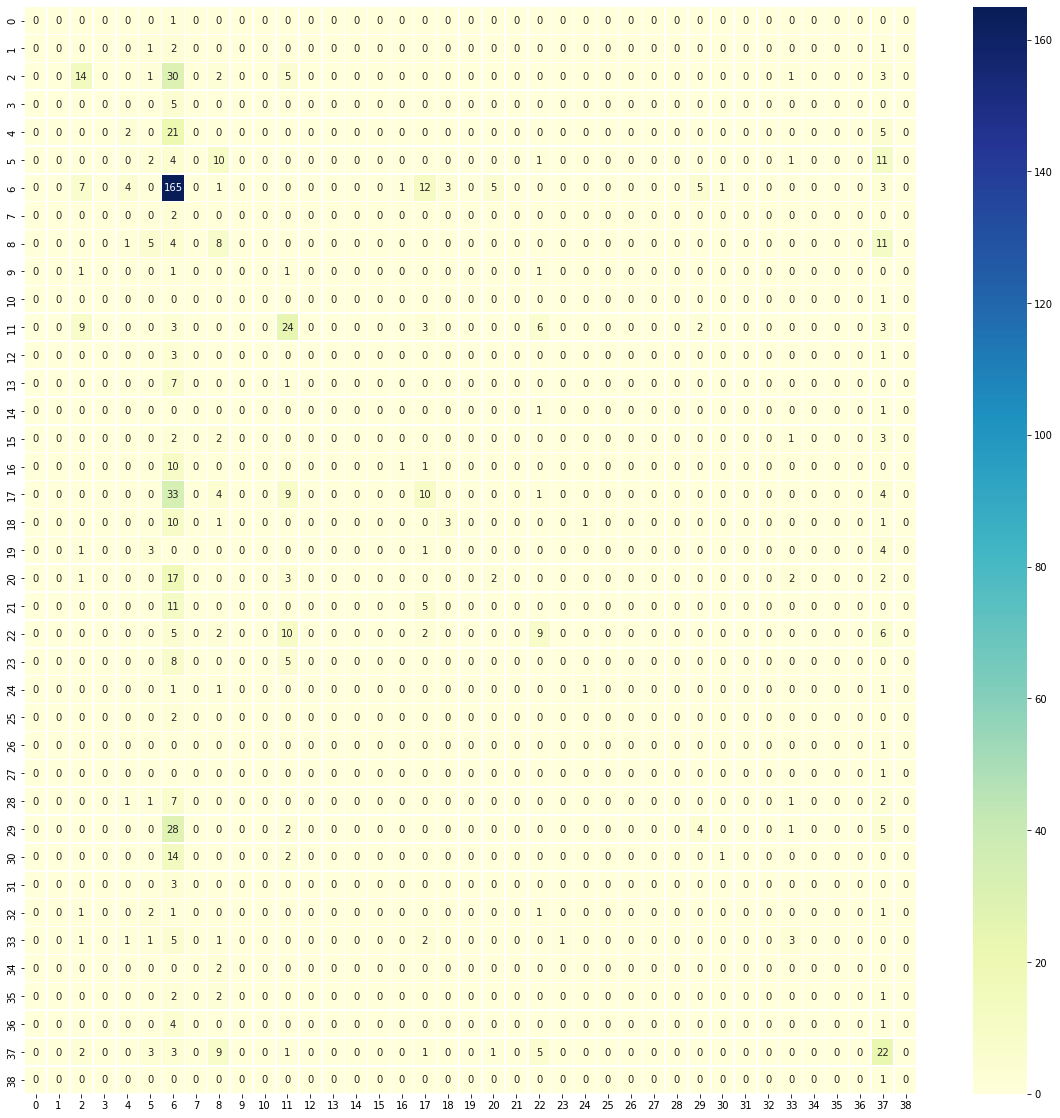

In [ ]:
fig = plt.figure(figsize=(20,20))
ax= fig.add_subplot(1,1,1)
sns.heatmap(result, annot=True,ax=ax, fmt="d",cmap="YlGnBu",linewidths=.5)
plt.show()

In [ ]:
#to get precision,f-1 score, recall  we can use classification report 
#from "https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html"
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred,labels=categories))

                                precision    recall  f1-score   support

          Allergy / Immunology       0.00      0.00      0.00         1
                    Bariatrics       0.00      0.00      0.00         4
    Cardiovascular / Pulmonary       0.38      0.25      0.30        56
                     Dentistry       0.00      0.00      0.00         5
                       Urology       0.22      0.07      0.11        28
              General Medicine       0.11      0.07      0.08        29
                       Surgery       0.40      0.80      0.53       207
             Speech - Language       0.00      0.00      0.00         2
 SOAP / Chart / Progress Notes       0.18      0.28      0.22        29
                Sleep Medicine       0.00      0.00      0.00         4
                  Rheumatology       0.00      0.00      0.00         1
                     Radiology       0.38      0.48      0.42        50
       Psychiatry / Psychology       0.00      0.00      0.00  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#for the logestic regression model we can notice that the accuracy is 34 percent.

one of the reasons for the low accuracy is that some of the categories have very less sample , So we can use SMOTE method to rectify  dataimabalance to some extent.

In [ ]:
smote_over_sample = SMOTE(sampling_strategy='minority',k_neighbors=1)

X1, y1 = smote_over_sample.fit_resample(PCA_X, y)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, stratify=y1,random_state=1)   
print(X_train1.shape)
print(X_test1.shape)

(3723, 3931)
(1241, 3931)


 "ValueError: "Expected n_neighbors <= n_samples, but n_samples = 3, n_neighbors = 6."
above error occured as some of our categories have very less values in data . so in order to apply smote we have to remove data related to some categories.
to avoid removing data , I have tried to use k_neighbors=1.
#from "https://stackoverflow.com/questions/49395939/smote-initialisation-expects-n-neighbors-n-samples-but-n-samples-n-neighbo"

In [ ]:
#creating model with new train sets
from sklearn.linear_model import LogisticRegression
classify1 = LogisticRegression(penalty= 'elasticnet', solver= 'saga',random_state=1,l1_ratio=0.5).fit(X_train1, y_train1)
y_test_pred1= classify1.predict(X_test1)

In [ ]:
result1=confusion_matrix(y_test1, y_test_pred1, labels=categories)

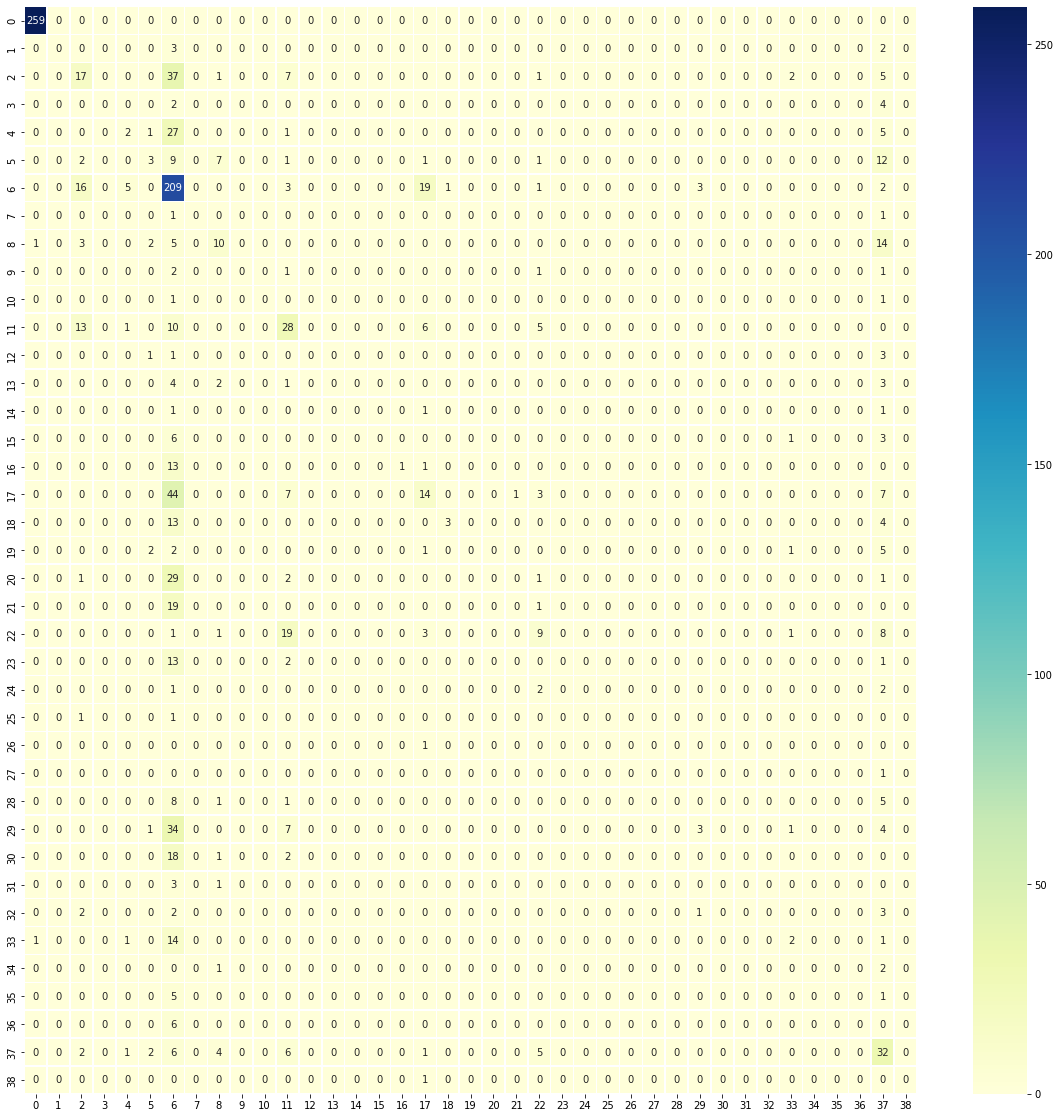

In [ ]:
fig = plt.figure(figsize=(20,20))
ax= fig.add_subplot(1,1,1)
sns.heatmap(result1, annot=True,ax=ax, fmt="d",cmap="YlGnBu",linewidths=.5)
plt.show()

In [ ]:
print(classification_report(y_test1,y_test_pred1,labels=categories))

                                precision    recall  f1-score   support

          Allergy / Immunology       0.99      1.00      1.00       259
                    Bariatrics       0.00      0.00      0.00         5
    Cardiovascular / Pulmonary       0.30      0.24      0.27        70
                     Dentistry       0.00      0.00      0.00         6
                       Urology       0.20      0.06      0.09        36
              General Medicine       0.25      0.08      0.12        36
                       Surgery       0.38      0.81      0.52       259
             Speech - Language       0.00      0.00      0.00         2
 SOAP / Chart / Progress Notes       0.34      0.29      0.31        35
                Sleep Medicine       0.00      0.00      0.00         5
                  Rheumatology       0.00      0.00      0.00         2
                     Radiology       0.32      0.44      0.37        63
       Psychiatry / Psychology       0.00      0.00      0.00  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#We can see that accuracy is increased to 48 percent  

if we still feel like increasing accuracy we can try to have some domain knowledge from domain experts and try to decreasing the categories of Medicalspeciality column by binning them and reducing them to less no of categories .
